<a href="https://colab.research.google.com/github/Mingyang0816/Startup-Founders-Graph-Analysis/blob/main/Graph_Analysis_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graph Analysis I Notebook

Created multi-directed graph to analyze the citation relationships among startup founders and other researchers, up to one degree of separation. If one researcher cited another, a directed edge links the two nodes together. Also analyzed the top 10 researchers most frequently cited by each founder.

In [ ]:
!pip install pyvis

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 8.2 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
import networkx as nx
from pyvis.network import Network
import IPython
from IPython.core.display import display, HTML

# Entrepreneurs

In [ ]:
# Load entre publications data
entre_pubs = pd.read_excel("entrepreneur_pubs.xlsx")
entre_pubs.shape

(411, 8)

In [ ]:
# Load entre citations data
entre_cited = pd.read_excel("entrepreneur_cited.xlsx")
entre_cited.shape

(1170, 5)

In [ ]:
# Remove duplicate rows
entre_pubs = entre_pubs.drop_duplicates(subset = ["title", "researcher"])
entre_pubs.shape

(388, 8)

In [ ]:
# Join both dataframes
entre_df = pd.merge(entre_cited, entre_pubs, left_on = "original", right_on = "title", how = "left")
entre_df.shape

(1202, 13)

In [ ]:
# Extract relevant columns
entre_df = entre_df[["researcher", "title", "cited", "authors_x", "publication_x", "year_x"]]

# Rename columns
entre_df = entre_df.rename(columns = {"authors_x": "authors", "publication_x": "publication", "year_x": "year"})
entre_df.head()

researcher                                              title  \
0  Emily Leproust  Solution hybrid selection with ultra-long olig...   
1  Emily Leproust  Solution hybrid selection with ultra-long olig...   
2  Emily Leproust  Solution hybrid selection with ultra-long olig...   
3  Emily Leproust  Solution hybrid selection with ultra-long olig...   
4  Emily Leproust  Solution hybrid selection with ultra-long olig...   

                                               cited          authors  \
0  Genome sequencing in microfabricated high-dens...  ['Margulies M']   
1  Accurate multiplex polony sequencing of an evo...   ['Shendure J']   
2  Accurate whole genome sequencing using reversi...   ['Bentley DR']   
3  Rapid whole-genome mutational profiling using ...     ['Smith DR']   
4  DNA sequencing of a cytogenetically normal acu...       ['Ley TJ']   

                publication  year  
0        Nature437, 376–380  2005  
1     Science309, 1728–1732  2005  
2          Nature456, 53–59  2008  
3  Genome Res.18, 1638–1642  2008  
4          Nature456, 66–72  2008

In [ ]:
# Convert year to strings
entre_df["year"] = entre_df["year"].astype(str)

In [ ]:
# Convert authors column to lists
entre_df["authors"] = entre_df["authors"].apply(lambda x: ast.literal_eval(x))

In [ ]:
def create_entre_initials(name):

    if name == "Emily Leproust":
        return "EM LeProust"

    elif name == "Jonathan D Steckbeck":
        return "JD Steckbeck"

    elif name == "Stephen Balaban":
        return "S Balaban"

    elif name == "William Red Whittaker":
        return "W Whittaker"

    elif name == "Ross Diankov":
        return "R Diankov"

    elif name == "Chris Urmson":
        return "C Urmson"

In [ ]:
# Create column for author initials
entre_df["initials"] = entre_df["researcher"].apply(create_entre_initials)

In [ ]:
entre_df.head(5)

researcher                                              title  \
0  Emily Leproust  Solution hybrid selection with ultra-long olig...   
1  Emily Leproust  Solution hybrid selection with ultra-long olig...   
2  Emily Leproust  Solution hybrid selection with ultra-long olig...   
3  Emily Leproust  Solution hybrid selection with ultra-long olig...   
4  Emily Leproust  Solution hybrid selection with ultra-long olig...   

                                               cited        authors  \
0  Genome sequencing in microfabricated high-dens...  [Margulies M]   
1  Accurate multiplex polony sequencing of an evo...   [Shendure J]   
2  Accurate whole genome sequencing using reversi...   [Bentley DR]   
3  Rapid whole-genome mutational profiling using ...     [Smith DR]   
4  DNA sequencing of a cytogenetically normal acu...       [Ley TJ]   

                publication  year     initials  
0        Nature437, 376–380  2005  EM LeProust  
1     Science309, 1728–1732  2005  EM LeProust  
2          Nature456, 53–59  2008  EM LeProust  
3  Genome Res.18, 1638–1642  2008  EM LeProust  
4          Nature456, 66–72  2008  EM LeProust

In [ ]:
def replace_authors(author_list):
    '''
    Replace author's full name with author's initials

    Parameters
    ----------
    author_list: list of author names

    Return
    ------
    author_list: list of author names, with full name replaced by initials

    '''

    # List of initials
    replace_list = ["EM LeProust", "JD Steckbeck", "S Balaban", "W Whittaker", "R Diankov", "C Urmson"]

    for idx, author in enumerate(author_list):

        for initial in replace_list:

            # Extract last name
            last_name = initial.split()[-1]

            # Replace full name with initials
            if last_name.lower() in author.lower():
                author_list[idx] = initial

    return author_list

In [ ]:
# Replace author's full name with initials
entre_df["authors"] = entre_df["authors"].apply(replace_authors)

In [ ]:
# Extract relevant columns
entre_cited_df = entre_df.copy()
entre_cited_df = entre_cited_df[["title", "cited", "initials", "authors"]]
entre_cited_df.head()

title  \
0  Solution hybrid selection with ultra-long olig...   
1  Solution hybrid selection with ultra-long olig...   
2  Solution hybrid selection with ultra-long olig...   
3  Solution hybrid selection with ultra-long olig...   
4  Solution hybrid selection with ultra-long olig...   

                                               cited     initials  \
0  Genome sequencing in microfabricated high-dens...  EM LeProust   
1  Accurate multiplex polony sequencing of an evo...  EM LeProust   
2  Accurate whole genome sequencing using reversi...  EM LeProust   
3  Rapid whole-genome mutational profiling using ...  EM LeProust   
4  DNA sequencing of a cytogenetically normal acu...  EM LeProust   

         authors  
0  [Margulies M]  
1   [Shendure J]  
2   [Bentley DR]  
3     [Smith DR]  
4       [Ley TJ]

In [ ]:
# Convert df to dictionary
entres = entre_cited_df.to_dict(orient = "records")
len(entres)

1202

In [ ]:
entres[0]

{'title': 'Solution hybrid selection with ultra-long oligonucleotides for massively parallel targeted sequencing',
 'cited': 'Genome sequencing in microfabricated high-density picolitre reactors',
 'initials': 'EM LeProust',
 'authors': ['Margulies M']}

In [ ]:
def create_multidigraph(cited_dict):
    '''
    Create multidigraph with nodes representing authors, and
    directed edges representing one author citing another

    Parameters
    ----------
    cited_dict: dictionary of journal citations

    Return
    ------
    G: multidigraph representing author citation relationships

    '''

    # Create multidigraph
    G = nx.MultiDiGraph()

    # Create directed edge for one author who cited another
    for cited in cited_dict:
        for i in range(len(cited["authors"])):
            G.add_edge(cited["initials"], cited["authors"][i], title = cited["title"], cited = cited["cited"])

    print("Number of nodes in this multi-digraph =", G.number_of_nodes())
    print("Number of edges in this multi-digraph =", G.number_of_edges())

    return G

In [ ]:
entre_graph = create_multidigraph(entres)

Number of nodes in this multi-digraph = 2192
Number of edges in this multi-digraph = 3130


In [ ]:
def top_10_cited(graph, author):
    '''
    Calculate top 10 authors most cited by specified author.

    Parameters
    ----------
    graph: multidigraph representing author citation relationships
    author: name of specified author

    Return
    ------
    top_10: dictionary of top 10 authors most cited by specified author,
            with author name being keys, and number of journals cited being values
    '''

    # Create empty dict
    cited_counts = {}

    for _, target in graph.out_edges(author):

        # Increment number of journals cited
        if target in cited_counts:
            cited_counts[target] += 1
        else:
            cited_counts[target] = 1

    # Rank by number of journals cited (descending)
    sorted_counts = sorted(cited_counts.items(), key = lambda item: item[1], reverse = True)
    top_10 = sorted_counts[:10]

    return top_10

In [ ]:
def plot_most_cited(graph, founders, num_rows, num_cols, figsize):
    '''
    Plot most frequently cited authors for each author.

    Parameters
    ----------
    graph: multidigraph representing author citation relationships
    founders: list of author names
    num_rows: number of rows of subplots
    num_cols: number of columns of subplots
    figsize: tuple indicating width and height of plot

    '''

    # Create base figure
    fig, axes = plt.subplots(num_rows, num_cols, figsize = figsize)

    # Flatten array of subplot axes
    axes = axes.flatten()

    for idx, founder in enumerate(founders):

        # Top 10 most frequently cited authors
        top_cited = top_10_cited(graph, founder)
        names = [name for name, count in top_cited]
        counts = [count for name, count in top_cited]

        # Create bar plot
        axes[idx].bar(names, counts, color = "skyblue")
        axes[idx].set_title(f"Most Cited Researchers by {founder}")
        axes[idx].set_xlabel("Name")
        axes[idx].set_ylabel("Count")
        axes[idx].tick_params(axis = "x", rotation = 45)
        axes[idx].set_ylim(0, max(counts) + 1)

    for j in range(len(founders), len(axes)):
        axes[j].axis('off')

    plt.subplots_adjust(hspace = 0.3)
    plt.show()

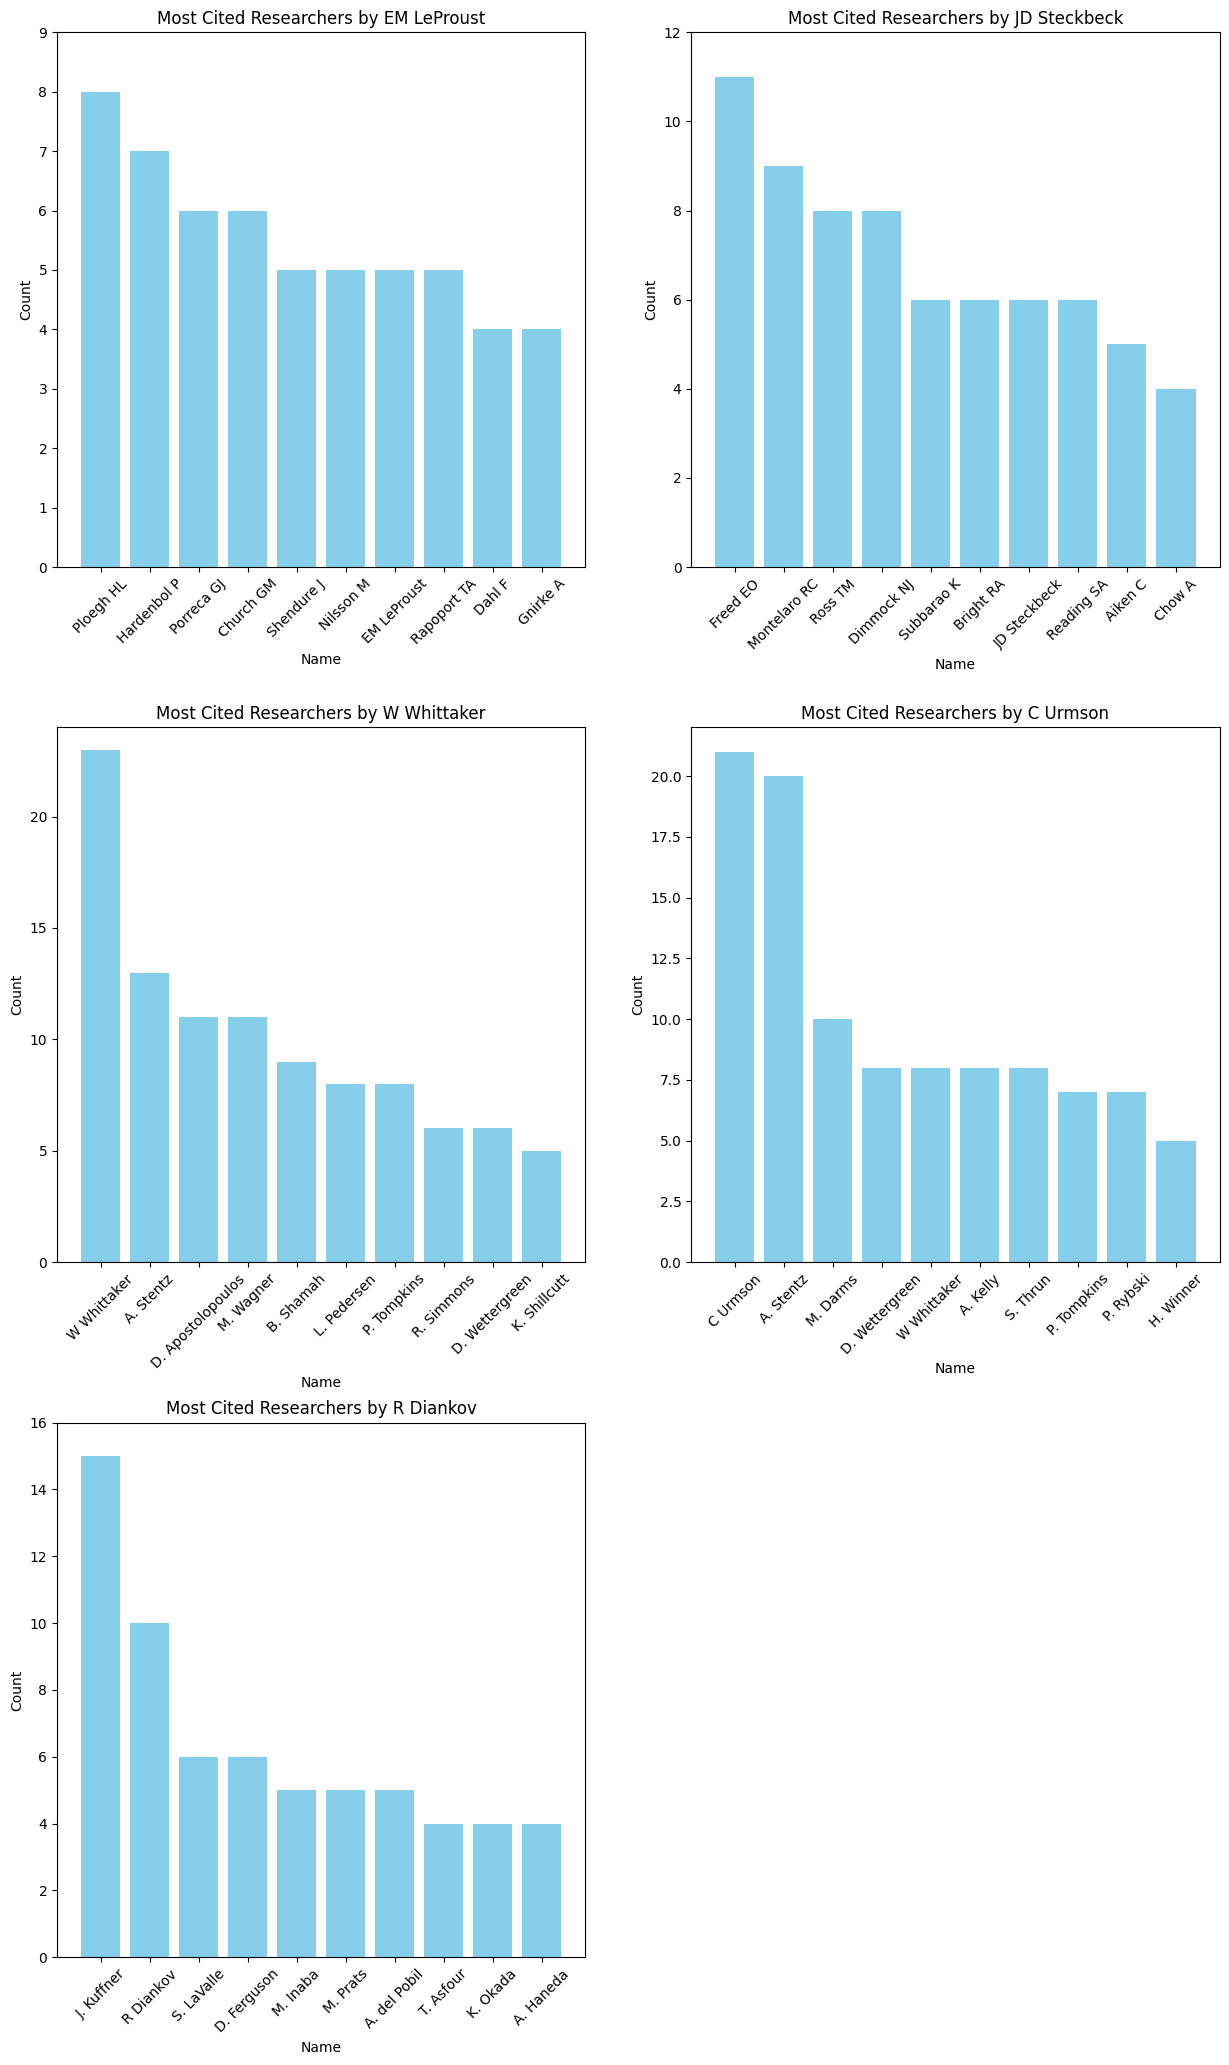

In [ ]:
entres = ["EM LeProust", "JD Steckbeck", "W Whittaker", "C Urmson", "R Diankov"]
plot_most_cited(entre_graph, entres, 3, 2, (15, 25))

In [ ]:
# Create interactive graph
net = Network(directed = True, notebook = True, cdn_resources = "in_line")
net.from_nx(entre_graph)
net.show("network.html")
IPython.display.HTML("network.html")

network.html


# Founders

In [ ]:
# Load founder publications data
founder_pubs = pd.read_excel("founder_pubs.xlsx")
founder_pubs.shape

(341, 8)

In [ ]:
# Load founder citations data
founder_cited = pd.read_excel("founder_cited.xlsx")
founder_cited.shape

(1433, 5)

In [ ]:
# Remove duplicate rows
founder_pubs = founder_pubs.drop_duplicates(subset = ["title", "researcher"])
founder_pubs.shape

(330, 8)

In [ ]:
# Join both dataframes
founder_df = pd.merge(founder_cited, founder_pubs, left_on = "original", right_on = "title", how = "left")
founder_df.shape

(1433, 13)

In [ ]:
# Extract relevant columns
founder_df = founder_df[["researcher", "title_y", "title_x", "author", "publication_x", "year_x"]]

# Rename columns
founder_df = founder_df.rename(columns = {"title_y": "title", "title_x": "cited", "author": "authors", "publication_x": "publication", "year_x": "year"})
founder_df.head()

researcher                                       title  \
0  Leonard Charles Jarrott  Burning plasma achieved in inertial fusion   
1  Leonard Charles Jarrott  Burning plasma achieved in inertial fusion   
2  Leonard Charles Jarrott  Burning plasma achieved in inertial fusion   
3  Leonard Charles Jarrott  Burning plasma achieved in inertial fusion   
4  Leonard Charles Jarrott  Burning plasma achieved in inertial fusion   

                                               cited  \
0  Final Report of the Committee on a Strategic P...   
1  Beyond alpha-heating: driving inertially confi...   
2            Approaching a burning plasma on the NIF   
3  Record energetics for an inertial fusion implo...   
4  The I-Raum: a new shaped hohlraum for improved...   

                                             authors  \
0  ['National Academies of Sciences, Engineering,...   
1                               ['Hurricane, O. A.']   
2                               ['Hurricane, O. A.']   
3                                 ['Zylstra, A. B.']   
4  ['Robey, H. F.', 'Berzak Hopkins, L.', 'Milovi...   

                              publication  year  
0                National Academies Press  2019  
1  Plasma Phys. Control. Fusion61, 014033  2019  
2                 Phys. Plasmas26, 052704  2019  
3             Phys. Rev. Lett.126, 025001  2021  
4                 Phys. Plasmas25, 012711  2018

In [ ]:
# Convert year to strings
founder_df["year"] = founder_df["year"].astype(str)

In [ ]:
# Convert authors column to lists
founder_df["authors"] = founder_df["authors"].apply(lambda x: ast.literal_eval(x))

In [ ]:
def create_founder_initials(name):

    if name == "Leonard Charles Jarrott":
        return "LC Jarrott"

    elif name == "Austin Draycott":
        return "AS Draycott"

    elif name == "David Weinberg":
        return "DE Weinberg"

    elif name == "Christopher R Carlson":
        return "CR Carlson"

    elif name == "Margaret Kocherga":
        return "M Kocherga"

    elif name == "Felix Wong":
        return "F Wong"

    elif name == "Maxwell Z Wilson":
        return "MZ Wilson"

    elif name == "Daniele Foresti":
        return "D Foresti"

    elif name == "Stuart Diller":
        return "S Diller"

    elif name == "Galen Clark Haynes":
        return "GC Haynes"

    elif name == "Jason Fontana":
        return "J Fontana"

    elif name == "Narek Melik-Barkhudarov":
        return "N Melik-Barkhudarov"

    elif name == "Cole J. T. Lewis":
        return "CJT Lewis"

    elif name == "Mitchell Hsing":
        return "M Hsing"

    elif name == "David Sparkman-Yager":
        return "D Sparkman-Yager"

In [ ]:
# Create column for author initials
founder_df["initials"] = founder_df["researcher"].apply(create_founder_initials)

In [ ]:
founder_df.head()

researcher                                       title  \
0  Leonard Charles Jarrott  Burning plasma achieved in inertial fusion   
1  Leonard Charles Jarrott  Burning plasma achieved in inertial fusion   
2  Leonard Charles Jarrott  Burning plasma achieved in inertial fusion   
3  Leonard Charles Jarrott  Burning plasma achieved in inertial fusion   
4  Leonard Charles Jarrott  Burning plasma achieved in inertial fusion   

                                               cited  \
0  Final Report of the Committee on a Strategic P...   
1  Beyond alpha-heating: driving inertially confi...   
2            Approaching a burning plasma on the NIF   
3  Record energetics for an inertial fusion implo...   
4  The I-Raum: a new shaped hohlraum for improved...   

                                             authors  \
0  [National Academies of Sciences, Engineering, ...   
1                                 [Hurricane, O. A.]   
2                                 [Hurricane, O. A.]   
3                                   [Zylstra, A. B.]   
4  [Robey, H. F., Berzak Hopkins, L., Milovich, J...   

                              publication  year    initials  
0                National Academies Press  2019  LC Jarrott  
1  Plasma Phys. Control. Fusion61, 014033  2019  LC Jarrott  
2                 Phys. Plasmas26, 052704  2019  LC Jarrott  
3             Phys. Rev. Lett.126, 025001  2021  LC Jarrott  
4                 Phys. Plasmas25, 012711  2018  LC Jarrott

In [ ]:
def replace_authors(author_list):
    '''
    Replace author's full name with author's initials

    Parameters
    ----------
    author_list: list of author names

    Return
    ------
    author_list: list of author names, with full name replaced by initials

    '''

    # List of initials
    replace_list = ["LC Jarrott", "DE Weinberg", "F Wong", "MZ Wilson", "GC Haynes", "J Fontana", "M Hsing"]

    for idx, author in enumerate(author_list):

        for full_name in replace_list:

            # Extract last name
            last_name = full_name.split()[-1]

            # Replace full name with initials
            if last_name.lower() in author.lower():
                author_list[idx] = full_name

    return author_list

In [ ]:
# Replace author's full name with initials
founder_df["authors"] = founder_df["authors"].apply(replace_authors)

In [ ]:
# Extract relevant columns
founder_cited_df = founder_df.copy()
founder_cited_df = founder_cited_df[["title", "cited", "initials", "authors"]]
founder_cited_df.head()

title  \
0  Burning plasma achieved in inertial fusion   
1  Burning plasma achieved in inertial fusion   
2  Burning plasma achieved in inertial fusion   
3  Burning plasma achieved in inertial fusion   
4  Burning plasma achieved in inertial fusion   

                                               cited    initials  \
0  Final Report of the Committee on a Strategic P...  LC Jarrott   
1  Beyond alpha-heating: driving inertially confi...  LC Jarrott   
2            Approaching a burning plasma on the NIF  LC Jarrott   
3  Record energetics for an inertial fusion implo...  LC Jarrott   
4  The I-Raum: a new shaped hohlraum for improved...  LC Jarrott   

                                             authors  
0  [National Academies of Sciences, Engineering, ...  
1                                 [Hurricane, O. A.]  
2                                 [Hurricane, O. A.]  
3                                   [Zylstra, A. B.]  
4  [Robey, H. F., Berzak Hopkins, L., Milovich, J...

In [ ]:
# Convert df to dictionary
founders = founder_cited_df.to_dict(orient = "records")
len(founders)

1433

In [ ]:
founders[0]

{'title': 'Burning plasma achieved in inertial fusion',
 'cited': 'Final Report of the Committee on a Strategic Plan for U.S. Burning Plasma Research',
 'initials': 'LC Jarrott',
 'authors': ['National Academies of Sciences, Engineering, and Medicine']}

In [ ]:
# Create multidigraph
founder_graph = create_multidigraph(founders)

Number of nodes in this multi-digraph = 2525
Number of edges in this multi-digraph = 3364


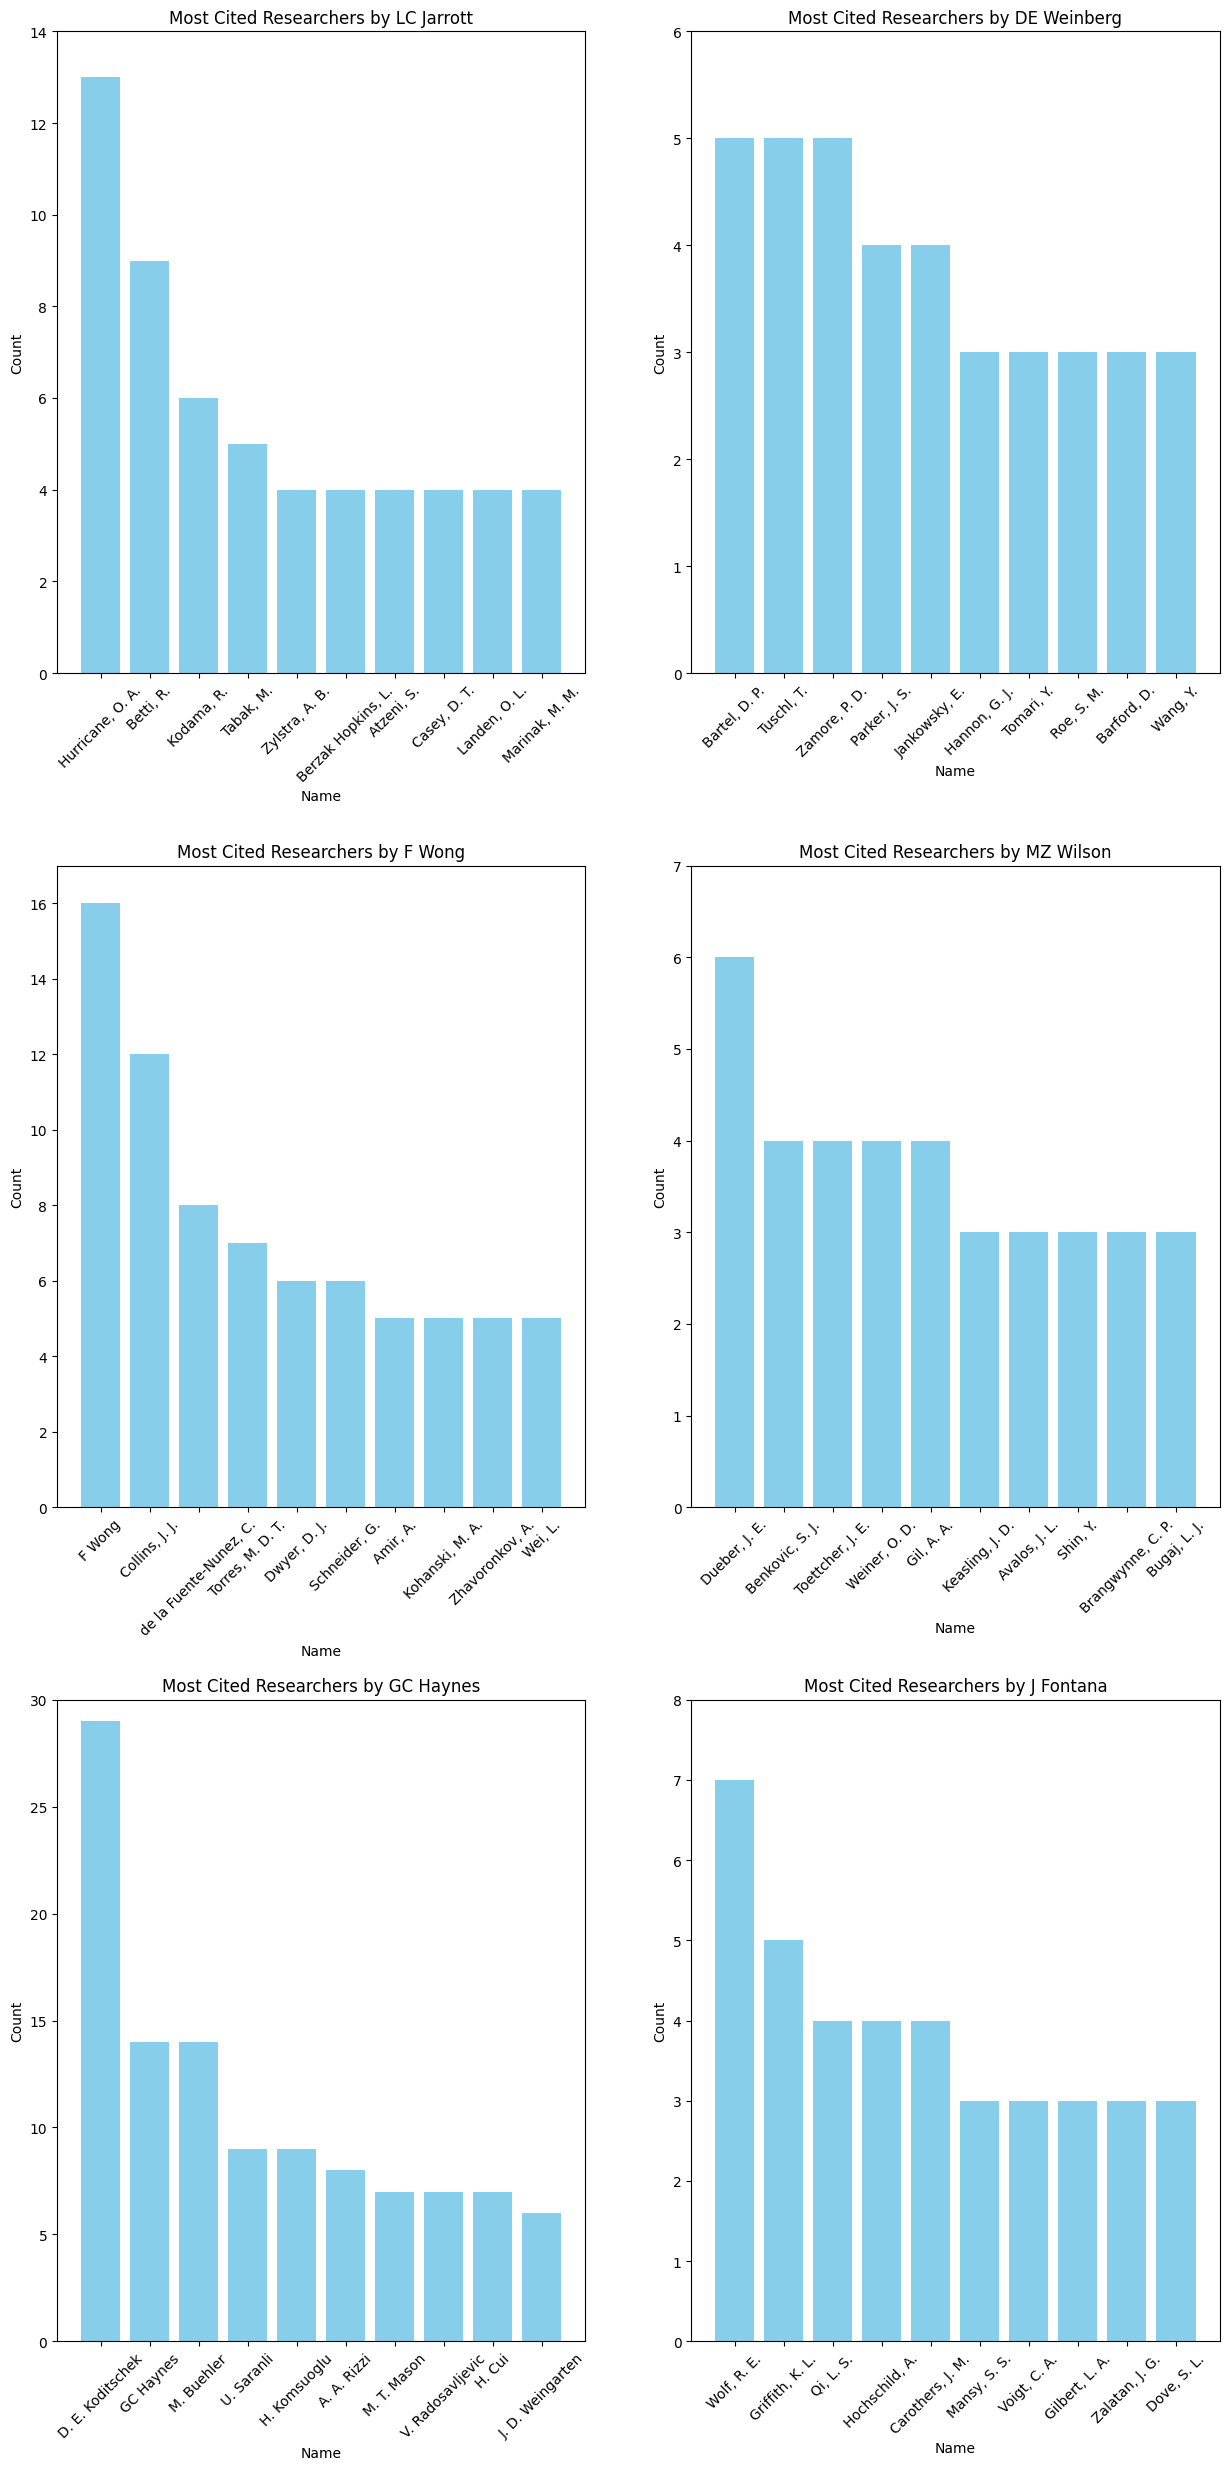

In [ ]:
# Plot most frequently cited authors
founders = ["LC Jarrott", "DE Weinberg", "F Wong", "MZ Wilson", "GC Haynes", "J Fontana"]
plot_most_cited(founder_graph, founders, 3, 2, (15, 30))

In [ ]:
# Create interactive graph
net = Network(directed = True, notebook = True, cdn_resources = "in_line")
net.from_nx(founder_graph)
net.show("network.html")
IPython.display.HTML("network.html")

network.html


In [ ]:
def centrality(graph, centrality_type):
    '''
    Calculate authors with highest centrality scores.

    Parameters
    ----------
    graph: multidigraph representing author citation relationships
    centrality_type: type of centrality measure (string)

    Return
    ------
    top_10: top 10 authors with highest centrality scores

    '''

    # Remove duplicate edges between authors
    simple_graph = nx.DiGraph(graph)

    # Calculate centrality scores
    if centrality_type == "eigenvector":
        centrality = nx.eigenvector_centrality(simple_graph, max_iter = 1000, tol = 1e-06)

    elif centrality_type == "betweenness":
        centrality = nx.betweenness_centrality(simple_graph)

    # Rank by centrality scores (descending)
    top_10 = sorted(centrality.items(), key = lambda item: item[1], reverse = True)[:10]
    return top_10

In [ ]:
print(centrality(founder_graph, "betweenness"))

[('GC Haynes', 0.00011384957283640272), ('MZ Wilson', 8.636864146209862e-05), ('LC Jarrott', 0.0), ('National Academies of Sciences, Engineering, and Medicine', 0.0), ('Hurricane, O. A.', 0.0), ('Zylstra, A. B.', 0.0), ('Robey, H. F.', 0.0), ('Berzak Hopkins, L.', 0.0), ('Milovich, J. L.', 0.0), ('Meezan, N. B.', 0.0)]


In [ ]:
def highest_out_deg(graph, num):
    '''
    Identify authors with highest out-degrees.

    Parameters
    ----------
    graph: multidigraph representing author citation relationships
    num: number of top authors to retrieve based on out-degree

    Return
    ------
    top_nodes: set of authors with highest out-degree

    '''

    # Calculate out-degree for each node
    out_degrees = graph.out_degree()

    # Rank by out-degree (descending)
    nodes = sorted(out_degrees, key = lambda item: item[1], reverse = True)[:num]

    top_nodes = {node for node, degree in nodes}
    return top_nodes

In [ ]:
def most_connected(graph, top_nodes):
    '''
    Identify authors who are most highly connected to other authors.

    Paramters
    ---------
    graph: multidigraph representing author citation relationships
    top_nodes: set of authors with highest out-degree

    Return
    ------
    sorted_nodes: list of tuples (author, count) representing
                  number of connections to authors in top_nodes
    '''

    # Create empty dict
    counts = {}

    for node in graph.nodes():

        # Initialize connection count
        count = 0

        # Find incoming neighbors
        neighbors = graph.predecessors(node)

        # Increment connection count
        for neighbor in neighbors:
            if neighbor in top_nodes:
                count += 1

        # Update connection count
        counts[node] = count

    # Rank by connection count (descending)
    sorted_nodes = sorted(counts.items(), key = lambda item: item[1], reverse = True)

    return sorted_nodes

In [ ]:
top_nodes = highest_out_deg(founder_graph, 10)
most_connected = most_connected(founder_graph, top_nodes)
print(most_connected)

[('Wang, X.', 4), ('Wang, P.', 3), ('Wang, Y.', 3), ('Zhao, X.', 3), ('Bartel, D. P.', 2), ('Liu, J.', 2), ('Rouskin, S.', 2), ('Weissman, J. S.', 2), ('Zubradt, M.', 2), ('Parker, R.', 2), ('Jain, S.', 2), ('Mauer, J.', 2), ('Jia, G.', 2), ('Collins, J. J.', 2), ('Chen, L. L.', 2), ('Beckwith, J.', 2), ('Baba, T.', 2), ('Deng, Y.', 2), ('Yuan, H.', 2), ('Lu, T. K.', 2), ('Zhou, J.', 2), ('Chen, X.', 2), ('Church, G. M.', 2), ('Li, X.', 2), ('Gupta, S.', 2), ('Zhang, J.', 2), ('Huang, X.', 2), ('Lee, H.', 2), ('Müller-Hill, B.', 2), ('Prather, K. L.', 2), ('Silver, P. A.', 2), ('Datsenko, K. A.', 2), ('Wanner, B. L.', 2), ('Gibson, D. G.', 2), ('Nielsen, J.', 2), ('Keasling, J. D.', 2), ('Prather, K. L. J.', 2), ('Tan, S. Z.', 2), ('Fink, G. R.', 2), ('Voigt, C. A.', 2), ('Zhang, F.', 2), ('Lim, W. A.', 2), ('Yang, Y.', 2), ('Yu, D.', 2), ('Regot, S.', 2), ('GC Haynes', 2), ('Tang, H.', 2), ('J. Chestnutt', 2), ('J. Kuffner', 2), ('S. Schaal', 2), ('D. Fox', 2), ('F. Dellaert', 2), ('S